In [1]:
import sys

if '../' not in sys.path: 
    sys.path.append('../')

In [38]:
from autogrp import AutomataGroup, AutomataGroupElement, Permutation, all_words
from functools import partial
import random

In [88]:
def reduce_free_group_el(word, atoms, inverse=None): 
    tmp = word
    if inverse is None:
        for el in atoms: 
            tmp = tmp.replace(f'{el}{el}^-1', '')
            tmp = tmp.replace(f'{el}^-1{el}', '')
        while tmp != word: 
            word = tmp 
            tmp = tmp.replace(f'{el}{el}^-1', '')
            tmp = tmp.replace(f'{el}^-1{el}', '')
    else: 
        
        for el in atoms: 
            tmp = tmp.replace(f'{el}{inverse[el]}', '')
            tmp = tmp.replace(f'{inverse[el]}{el}', '')
        while tmp != word: 
            word = tmp 
            tmp = tmp.replace(f'{el}{inverse[el]}', '')
            tmp = tmp.replace(f'{inverse[el]}{el}', '')
    return tmp 


def generate_adding_G1(force=True): 

    a = AutomataGroupElement('a', permutation=Permutation([1, 0]), children=['e', 'a'], is_atom=True)
    b = AutomataGroupElement('b', permutation=Permutation([0, 1]), children=['b', 'a'], is_atom=True)
    a_inv = AutomataGroupElement('а^-1', permutation=Permutation([1, 0]), children=['а^-1', 'e'], is_atom=True)
    b_inv = AutomataGroupElement('б^-1', permutation=Permutation([0, 1]), children=['б^-1', 'а'], is_atom=True)
    if force and 'G1' in AutomataGroup.all_instances(): 
        AutomataGroup.clear_group('G1')
    
    reduce_f = partial(reduce_free_group_el, atoms=('a' 'b'), inverse={'a': 'а^-1', 'b': 'б^-1'})
    return AutomataGroup('G1', [a, b, a_inv, b_inv], reduce_function=reduce_f)


In [89]:
G = generate_adding_G1(True)
a, b, a_inv, b_inv = G.gens

In [90]:
G.disable_lempel_ziv()

In [91]:
def random_el(size, group): 
    res = group.one
    for i in range(size): 
        res = res * random.choice(group.gens)
    return res

In [92]:
x = random_el(20, G)
x.show()

ValueError: Unknown element: б

In [36]:
a * b * a_inv * b

G1(aba^-1b = (1) (ab, ba))

In [27]:
G('abb').is_one()

False

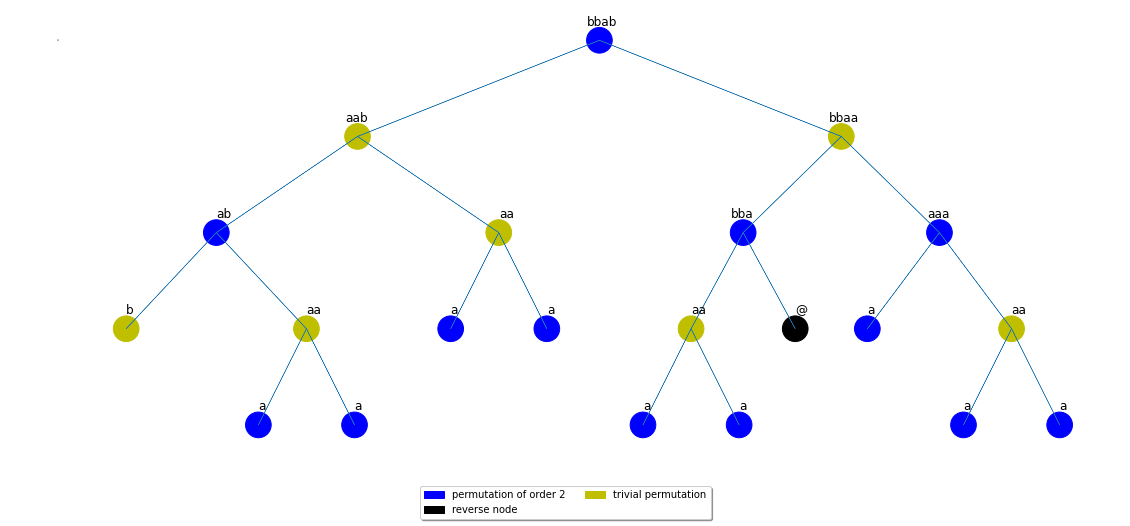

In [44]:
G('bbab').show()

In [64]:
def calc_brute(word, group): 
    res = group.one
    for el in word: 
        res *= group(word)
    return res

In [65]:
def find_trivia(deep): 
    assert deep >= 1 
    for el in all_words(['a', 'b', 'a^-1', 'b^-1'], max_len=deep, allow_same_neighbours=True): 
        el = calc_brute(el, G)
        if el.is_one(): 
            yield el 

            
for el in find_trivia(20): 
    print(el)

ValueError: Unknown element: ^